<a href="https://colab.research.google.com/github/tmukayev/Data-Science-projects/blob/main/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [515]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn

## Model 1. KNN:


1.   Load housing dataset 
2.   Feature engineer $/sqft column
3.   KNN model to categorize price ranges: 
     inputs: latitude / longitude;
     output: $/sqft category 

## Model 2. Linear Regressor:


1.   Gets dataset feautures to output the predicted price (no taxes)
2.   Final categorization of under-valued (Function?)




In [288]:
house_df = pd.read_csv('/content/house_data.csv')

In [189]:
# house_df

In [290]:
house_df.columns

Index(['Unnamed: 0', 'MLS', 'sold_price', 'zipcode', 'longitude', 'latitude',
       'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft',
       'garage', 'kitchen_features', 'fireplaces', 'floor_covering', 'HOA',
       'cooking', 'storage', 'cleaning', 'countertop', 'water', 'tile',
       'carpet', 'stone', 'other floor'],
      dtype='object')

In [291]:
house_df = house_df.drop(['Unnamed: 0', 'MLS', 'kitchen_features'], axis=1)

In [292]:
# Add a new column "price_per_sqft"
house_df['price_per_sqft'] = house_df['sold_price'] / house_df['sqrt_ft']

In [293]:
# house_df

In [294]:
house_df.columns

Index(['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes',
       'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'floor_covering', 'HOA', 'cooking', 'storage', 'cleaning',
       'countertop', 'water', 'tile', 'carpet', 'stone', 'other floor',
       'price_per_sqft'],
      dtype='object')

In [295]:
house_df['price_per_sqft'].describe()

count    5000.000000
mean             inf
std              NaN
min        24.544805
25%       175.904804
50%       203.191206
75%       235.648035
max              inf
Name: price_per_sqft, dtype: float64

In [296]:
# house_df['price_per_sqft'].isna().sum()

In [297]:
# nans = house_df['price_per_sqft'].isna().sum()
# print("Number of NaN values:", nans)

In [298]:
# check for infinity values
print("Number of Inf values:", np.isinf(house_df['price_per_sqft']).sum())

Number of Inf values: 56


In [299]:
house_df = house_df.replace([np.inf, -np.inf], np.nan)
house_df = house_df.dropna(subset=['price_per_sqft'])

In [300]:
house_df['price_per_sqft'].describe()

count    4944.000000
mean      212.527212
std        66.730393
min        24.544805
25%       175.502133
50%       202.598297
75%       234.103497
max      1208.333333
Name: price_per_sqft, dtype: float64

In [301]:
house_df.shape

(4944, 24)

In [302]:
house_df.reset_index(drop=True, inplace=True)
house_df

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,cooking,storage,cleaning,countertop,water,tile,carpet,stone,other floor,price_per_sqft
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,...,True,True,True,False,False,False,False,False,True,504.761905
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,...,False,False,True,False,False,False,False,False,False,575.342466
2,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,...,False,True,True,True,False,False,False,False,True,498.946668
3,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,...,True,True,True,False,False,False,True,False,True,533.372420
4,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,...,True,True,True,False,False,False,False,False,True,475.007308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,...,False,True,True,True,False,False,True,False,False,137.461816
4940,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,...,True,True,True,True,False,False,True,False,False,237.273512
4941,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,...,False,True,True,True,True,False,False,False,False,268.058691
4942,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,...,True,True,True,True,False,False,True,False,False,147.690655


In [303]:
house_df['latitude'].describe()

count    4944.000000
mean       32.314540
std         0.169380
min        31.356362
25%        32.280278
50%        32.319136
75%        32.396124
max        34.927884
Name: latitude, dtype: float64

## KNN gets: long / lat data => $ / sqft

In [304]:
house_df['price_per_sqft'].describe()

count    4944.000000
mean      212.527212
std        66.730393
min        24.544805
25%       175.502133
50%       202.598297
75%       234.103497
max      1208.333333
Name: price_per_sqft, dtype: float64

In [305]:
house_df.head()

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,cooking,storage,cleaning,countertop,water,tile,carpet,stone,other floor,price_per_sqft
0,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,...,True,True,True,False,False,False,False,False,True,504.761905
1,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,...,False,False,True,False,False,False,False,False,False,575.342466
2,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,...,False,True,True,True,False,False,False,False,True,498.946668
3,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,...,True,True,True,False,False,False,True,False,True,533.372420
4,3250000.0,85718,-110.910593,32.339090,1.67,27802.84,1999,3,4.0,6842.0,...,True,True,True,False,False,False,False,False,True,475.007308


In [306]:
house_df.columns

Index(['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes',
       'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'floor_covering', 'HOA', 'cooking', 'storage', 'cleaning',
       'countertop', 'water', 'tile', 'carpet', 'stone', 'other floor',
       'price_per_sqft'],
      dtype='object')

In [307]:
# Define the number of bins
num_bins = 10

# Calculate the bin width based on the range of 'price_per_sqft'
bin_width = (house_df['price_per_sqft'].max() - house_df['price_per_sqft'].min()) / num_bins

# Define the bin edges
bin_edges = [house_df['price_per_sqft'].min() + i * bin_width for i in range(num_bins + 1)]

# Assign each value to a bin based on the bin edges
bins = []
for value in house_df['price_per_sqft']:
    for i in range(num_bins):
        if bin_edges[i] <= value < bin_edges[i+1]:
            bins.append(i + 1)
            break

# Create a new column 'price_per_sqft_bins' with the bin values
house_df['price_per_sqft_bins'] = pd.Series(bins)

# Print the number of values in each bin
print(house_df['price_per_sqft_bins'].value_counts())

# Define the ranges of each bin
bin_ranges = [(bin_edges[i], bin_edges[i+1]) for i in range(num_bins)]

# Define the widths of each bin
bin_widths = [bin_edges[i+1] - bin_edges[i] for i in range(num_bins)]

# Print the bin ranges and widths
for i in range(num_bins):
    print(f'Bin {i+1} ({bin_ranges[i][0]:.2f}, {bin_ranges[i][1]:.2f}): width = {bin_widths[i]:.2f}')


2.0    3978
3.0     565
1.0     297
4.0      64
5.0      26
6.0       5
7.0       5
8.0       3
Name: price_per_sqft_bins, dtype: int64
Bin 1 (24.54, 142.92): width = 118.38
Bin 2 (142.92, 261.30): width = 118.38
Bin 3 (261.30, 379.68): width = 118.38
Bin 4 (379.68, 498.06): width = 118.38
Bin 5 (498.06, 616.44): width = 118.38
Bin 6 (616.44, 734.82): width = 118.38
Bin 7 (734.82, 853.20): width = 118.38
Bin 8 (853.20, 971.58): width = 118.38
Bin 9 (971.58, 1089.95): width = 118.38
Bin 10 (1089.95, 1208.33): width = 118.38


In [308]:
house_df.price_per_sqft_bins

0       5.0
1       5.0
2       5.0
3       5.0
4       4.0
       ... 
4939    2.0
4940    3.0
4941    2.0
4942    1.0
4943    NaN
Name: price_per_sqft_bins, Length: 4944, dtype: float64

In [309]:
# house_df.dropna

In [310]:
has_nan = house_df['price_per_sqft_bins'].isnull().any()

if has_nan:
    print("The 'feature' column contains NaN values.")
else:
    print("The 'feature' column does not contain NaN values.")

The 'feature' column contains NaN values.


In [311]:
house_df = house_df.dropna(subset=['price_per_sqft_bins'])

In [312]:
house_df['price_per_sqft_bins'] = house_df['price_per_sqft_bins'].astype(int)

<ipython-input-312-ce68eef32278>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df['price_per_sqft_bins'] = house_df['price_per_sqft_bins'].astype(int)


In [313]:
has_nan = house_df['price_per_sqft_bins'].isnull().any()

if has_nan:
    print("The 'feature' column contains NaN values.")
else:
    print("The 'feature' column does not contain NaN values.")

The 'feature' column does not contain NaN values.


In [314]:
#Shuffle rows
house_df = house_df.sample(frac=1)

In [315]:
X = house_df[['longitude', 'latitude', 'sqrt_ft', 'price_per_sqft_bins']].to_numpy()

In [316]:
# Split the data into training and test sets
train_size = int(0.9 * len(X))
X_train, y_train = X[:train_size, :], X[:train_size, -1]
X_test, y_test = X[train_size:, :], X[train_size:, -1]

y_test = y_test.astype(int)
y_train = y_train.astype(int)

In [317]:
# X_train = X_test
# y_train = y_test
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4448, 4), (4448,), (495, 4), (495,))

In [318]:
X.shape

(4943, 4)

In [319]:
class KNNClassifier():

  def fit(self, X, y):
    self.X = X
    self.y = y

  def predict(self, X, k, epsilon = 1e-3):
    N = len(X)
    y_hat = np.zeros(N)

    for i in range(N):
      # getting list of distances
      dist2 = np.sum((self.X - X[i]) ** 2, axis=1)
      idxt = np.argsort(dist2)[:k] # the k nearest
      # a list of the 1/distances
      gamma_k = 1 / (np.sqrt(dist2[idxt]+epsilon))
      y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
    
    return y_hat

In [320]:

# # Normalize the features
# X_normalized = X.copy()
# X_normalized[:, 0] = X[:, 0] / 180  # longitude range 
# X_normalized[:, 1] = X[:, 1] / 90 # latitude range

# Create an instance of the KNNclassifier
knn = KNNClassifier()

# Fit the classifier with the training data
knn.fit(X_train, y_train)

# Choose a suitable value for k (number of neighbors)
k = 45

# Predict the price category for the test data
y_hat = knn.predict(X_test, k)

In [321]:
# Calculate the accuracy
correct_predictions = np.sum(y_test == y_hat)
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 83.23%


## Finding Overvalued/Undervalued Houses

In [801]:
# Create a dictionary of bin statistics
bin_stats = {}
for bin_name in house_df['price_per_sqft_bins'].unique():
    bin_data = house_df[house_df['price_per_sqft_bins'] == bin_name]
    bin_mean = bin_data['price_per_sqft'].mean()
    bin_std = bin_data['price_per_sqft'].std()
    bin_stats[bin_name] = (bin_mean, bin_std)

bin_stats

{2: (202.37096512965945, 47.05355995720464),
 1: (193.1680537195025, 43.209606859636224),
 3: (251.8792276656321, 68.38256424028154),
 5: (469.3825893001915, 127.43450198150023),
 4: (373.52084315368216, 97.69562939505562),
 7: (829.6185705972646, 23.35807735556249),
 6: (585.047196172563, 197.53019888217793),
 8: (911.1044715561297, 53.67277453705526)}

Index(['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes',
       'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'floor_covering', 'HOA', 'cooking', 'storage', 'cleaning',
       'countertop', 'water', 'tile', 'carpet', 'stone', 'other floor',
       'price_per_sqft', 'price_per_sqft_bins'],
      dtype='object')

In [325]:
# house_df = house_df.sample(frac=1)

In [424]:
def OLS(Y,Y_hat,N):
  return (1/(2*N)*np.sum((Y-Y_hat)**2))

In [425]:
def R2(Y,Y_hat,):
  return (1-(np.sum((Y-Y_hat)**2) / np.sum((Y-np.mean(Y))**2)))

In [426]:
class MVLinearRegression():
  def fit(self, X, y, eta = 1e-3, epochs = 1e3, show_curve = False):
    epochs = int(epochs)
    N, D = X.shape
    Y = y
    
    #Initialize the weights
    self.W = np.random.randn(D)

    J = np.zeros(epochs)
    
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      J[epoch] = OLS(Y, Y_hat, N)
      #weight update Rule:
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
      plt.show()

  def predict(self,X):
    return X @ self.W
    

In [427]:
myReg = MVLinearRegression()

In [428]:
house_df.reset_index(drop=True, inplace=True)

In [465]:
house_df.shape

(4943, 25)

In [464]:
# X1 = house_df[['longitude', 'latitude', 'sqrt_ft', 'price_per_sqft_bins', 'price_per_sqft']].copy()

In [447]:
# X1.describe()

,longitude,latitude,sqrt_ft,price_per_sqft_bins,price_per_sqft
count,4943.000000,4943.000000,4943.000000,4943.000000,4943.000000
mean,-110.910941,32.314728,3716.245317,2.108638,212.549120
std,0.120616,0.168881,1120.764320,0.570178,66.719361
min,-112.520168,31.356362,1100.000000,1.000000,24.544805
25%,-110.978610,32.280308,3047.000000,2.000000,175.535883
50%,-110.922473,32.319138,3512.000000,2.000000,202.603401
75%,-110.858570,32.396151,4129.000000,2.000000,234.103862
max,-109.454637,34.927884,22408.000000,8.000000,1208.333333


In [852]:
house_df.columns

Index(['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes',
       'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'fireplaces', 'floor_covering', 'HOA', 'cooking', 'storage', 'cleaning',
       'countertop', 'water', 'tile', 'carpet', 'stone', 'other floor',
       'price_per_sqft', 'price_per_sqft_bins'],
      dtype='object')

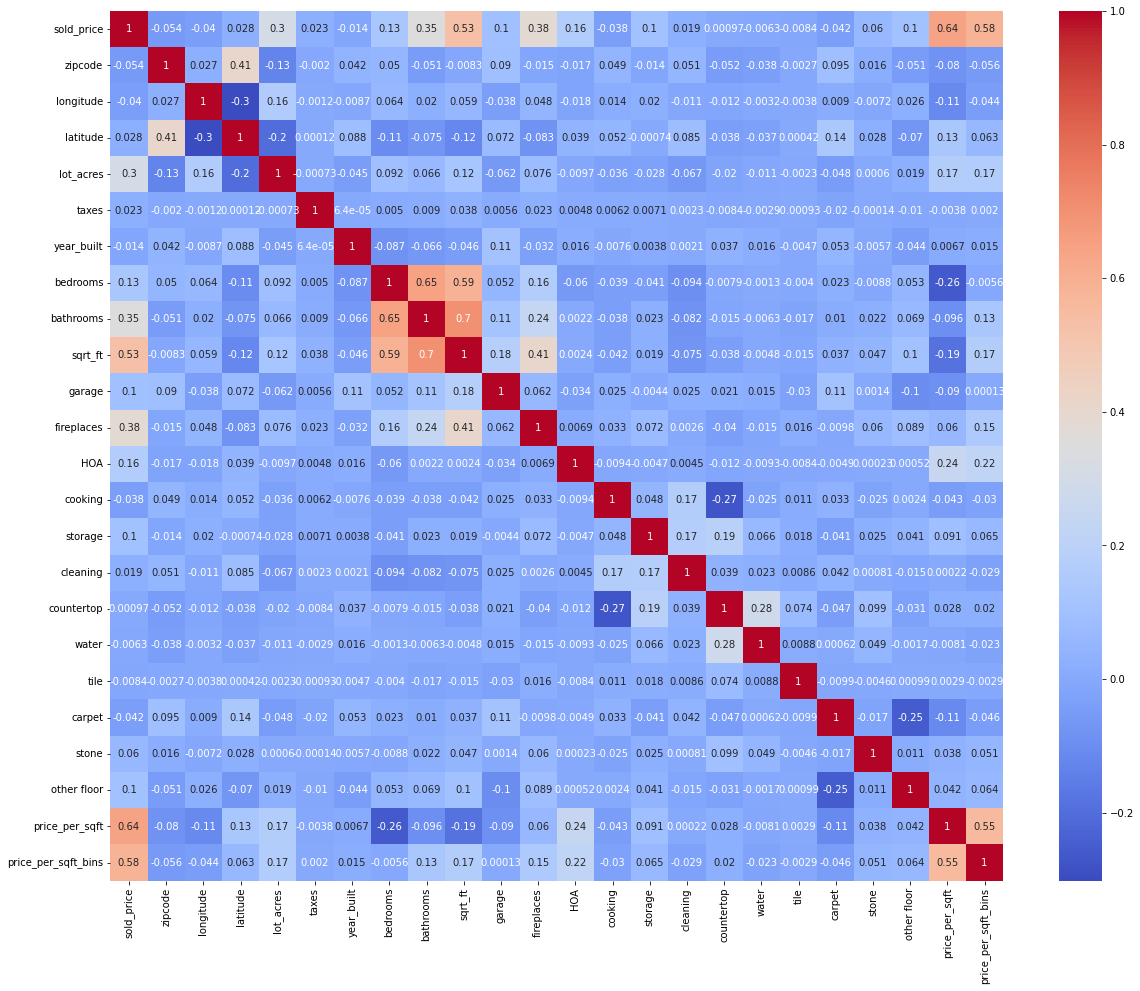

In [853]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = house_df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [891]:
X1 = house_df[['longitude', 'latitude','bedrooms', 'sqrt_ft','HOA','price_per_sqft']].copy()

In [892]:
X1.to_numpy()

array([[-1.10982174e+02,  3.24330110e+01,  4.00000000e+00,
         3.08400000e+03,  1.20000000e+01,  1.76303502e+02],
       [-1.10731555e+02,  3.22941310e+01,  4.00000000e+00,
         3.45000000e+03,  0.00000000e+00,  1.94492754e+02],
       [-1.10795109e+02,  3.22556740e+01,  5.00000000e+00,
         4.36400000e+03,  1.49000000e+02,  1.45508708e+02],
       ...,
       [-1.10729025e+02,  3.22632740e+01,  4.00000000e+00,
         3.53300000e+03,  1.70000000e+01,  1.82422870e+02],
       [-1.10871894e+02,  3.23120910e+01,  5.00000000e+00,
         3.71000000e+03,  4.40000000e+01,  2.39757412e+02],
       [-1.10967634e+02,  3.24074590e+01,  4.00000000e+00,
         3.06000000e+03,  0.00000000e+00,  2.12418301e+02]])

In [893]:
# Define a function to normalize a feature
def normalize_feature(feature):
    min_val = np.min(feature)
    max_val = np.max(feature)
    normalized_feature = (feature - min_val) / (max_val - min_val)
    return normalized_feature

# Normalize each feature in X1
X1_normalized = X1.copy()
X1_normalized['longitude'] = normalize_feature(X1_normalized['longitude'])
X1_normalized['latitude'] = normalize_feature(X1_normalized['latitude'])
X1_normalized['bedrooms'] = normalize_feature(X1_normalized['bedrooms'])
X1_normalized['sqrt_ft'] = normalize_feature(X1_normalized['sqrt_ft'])
X1_normalized['HOA'] = normalize_feature(X1_normalized['HOA'])
X1_normalized['price_per_sqft'] = normalize_feature(X1_normalized['price_per_sqft'])

In [894]:
# X1['longitude'] = (X1['longitude'] - 180) / 180
# X1['latitude'] = (X1['latitude'] - 90) / 90
X1_normalized.to_numpy()

array([[0.50170558, 0.30145383, 0.08571429, 0.09311057, 0.0006    ,
        0.12819747],
       [0.58345944, 0.26256845, 0.08571429, 0.11028722, 0.        ,
        0.14356276],
       [0.56272763, 0.25180077, 0.11428571, 0.1531819 , 0.00745   ,
        0.10218371],
       ...,
       [0.58428475, 0.25392872, 0.08571429, 0.11418247, 0.00085   ,
        0.13336678],
       [0.53767977, 0.26759712, 0.11428571, 0.12248921, 0.0022    ,
        0.18179988],
       [0.50644864, 0.29429946, 0.08571429, 0.09198423, 0.        ,
        0.15870528]])

In [905]:
# Define the train-test split ratio
X1_normalized = X1_normalized.sample(frac=1)
# Split the data into training and test sets
train_size = int(0.9 * len(X1_normalized))

X_train, y_train = X1_normalized.iloc[:train_size,:-1], X1_normalized.iloc[:train_size, -1]
X_test, y_test = X1_normalized.iloc[train_size:, :-1], X1_normalized.iloc[train_size:, -1]

X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

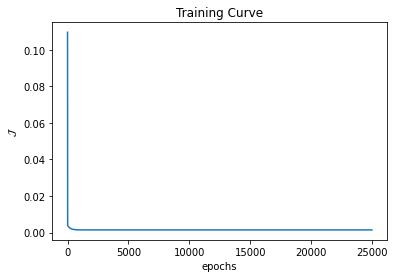

In [906]:
myReg.fit(X_train,y_train, epochs=25000, eta=1, show_curve=True)

In [907]:
Y_hat = myReg.predict(X_test)

In [908]:
def R2(Y,Y_hat,):
  return (1-(np.sum((Y-Y_hat)**2) / np.sum((Y-np.mean(Y))**2)))

In [909]:
R2(y_test,Y_hat)

0.18531493894835516

In [910]:
# Define a threshold z-score value for undervalued houses
threshold = -1

# Create a dictionary of bin statistics
bin_stats = {}
for bin_name in house_df['price_per_sqft_bins'].unique():
    bin_data = house_df[house_df['price_per_sqft_bins'] == bin_name]
    bin_mean = bin_data['price_per_sqft'].mean()
    bin_std = bin_data['price_per_sqft'].std()
    bin_stats[bin_name] = (bin_mean, bin_std)

# Calculate the z-score for each house
z_scores = []
for i in range(len(house_df)):
    bin_name = house_df.iloc[i]['price_per_sqft_bins']
    house_price_per_sqft = house_df.iloc[i]['price_per_sqft']
    house_mean, house_std = bin_stats[bin_name]
    z_score = (house_price_per_sqft - house_mean) / house_std
    z_scores.append(z_score)

# Classify the houses as undervalued, overvalued, or well-valued based on the z-score
house_df['valuation'] = np.where(np.array(z_scores) < threshold, 'undervalued', 'well-valued')

In [933]:
# z_scores
house_df['valuation']

0       well-valued
1       well-valued
2       undervalued
3       well-valued
4       well-valued
           ...     
4938    well-valued
4939    well-valued
4940    well-valued
4941    well-valued
4942    well-valued
Name: valuation, Length: 4943, dtype: object

In [913]:
# Initialize an empty dataframe to store undervalued houses
undervalued_df = pd.DataFrame(columns=house_df.columns)

# Iterate over each unique price_per_sqft_bins category
for bin_name in house_df['price_per_sqft_bins'].unique():
    # Get the mean and standard deviation for this category
    bin_mean, bin_std = bin_stats[bin_name]
    # Get all houses in this category
    bin_data = house_df[house_df['price_per_sqft_bins'] == bin_name]
    # Calculate the lower bound for the bin
    lower_bound = bin_mean - bin_std
    # Identify undervalued houses in this bin
    undervalued_data = bin_data[bin_data['price_per_sqft'] < lower_bound]
    # Append undervalued houses to the dataframe
    undervalued_df = pd.concat([undervalued_df, undervalued_data], ignore_index=True)


In [914]:
undervalued_df

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,cleaning,countertop,water,tile,carpet,stone,other floor,price_per_sqft,price_per_sqft_bins,valuation
0,635000.0,85749,-110.795109,32.255674,0.61,6535.00,1996,5,5.0,4364.0,...,True,False,False,False,True,False,False,145.508708,2,undervalued
1,455000.0,85718,-110.931769,32.326575,1.12,4361.00,1979,4,3.0,3239.0,...,True,False,False,False,True,False,False,140.475455,2,undervalued
2,550000.0,85716,-110.928964,32.232588,0.31,7537.01,1947,8,6.0,3819.0,...,True,False,False,False,True,False,False,144.016758,2,undervalued
3,799000.0,85704,-110.984526,32.335054,0.87,6176.80,1975,5,5.0,5665.0,...,True,False,False,False,True,False,False,141.041483,2,undervalued
4,615000.0,85718,-110.925844,32.290874,3.61,10548.61,1973,5,5.0,4399.0,...,True,False,False,False,True,False,True,139.804501,2,undervalued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1325000.0,85750,-110.862068,32.332178,1.47,12368.25,2000,4,5.0,4872.0,...,True,False,False,False,True,False,False,271.962233,4,undervalued
594,927500.0,85750,-110.813642,32.298738,1.46,8372.64,2007,4,4.0,3525.0,...,True,True,False,False,False,False,False,263.120567,4,undervalued
595,1000000.0,85750,-110.867130,32.328752,0.80,11642.96,2002,4,5.0,5722.0,...,True,True,False,False,True,False,True,174.764069,4,undervalued
596,2150000.0,85739,-110.883660,32.509721,0.00,19060.81,2008,2,3.0,2729.0,...,True,False,False,False,False,False,True,787.834372,7,undervalued


In [916]:
house_df

,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,...,cleaning,countertop,water,tile,carpet,stone,other floor,price_per_sqft,price_per_sqft_bins,valuation
0,543720.0,85755,-110.982174,32.433011,0.72,5713.00,2001,4,3.0,3084.0,...,True,False,False,False,True,False,False,176.303502,2,well-valued
1,671000.0,85749,-110.731555,32.294131,1.01,5008.06,2003,4,3.0,3450.0,...,True,True,True,False,True,False,False,194.492754,2,well-valued
2,635000.0,85749,-110.795109,32.255674,0.61,6535.00,1996,5,5.0,4364.0,...,True,False,False,False,True,False,False,145.508708,2,undervalued
3,865000.0,85718,-110.913394,32.300632,2.13,7105.17,1990,4,4.0,4153.0,...,True,False,False,False,True,False,False,208.283169,1,well-valued
4,651500.0,85718,-110.928289,32.285778,1.00,8385.87,2005,4,4.0,3666.0,...,False,False,False,False,True,False,False,177.714130,2,well-valued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,680000.0,85718,-110.917427,32.284453,1.05,7825.00,2001,4,4.0,3782.0,...,True,False,False,False,True,False,False,179.799048,2,well-valued
4939,720000.0,85742,-111.018190,32.351796,0.87,4738.00,1972,4,3.0,4510.0,...,True,False,False,False,True,False,True,159.645233,2,well-valued
4940,644500.0,85749,-110.729025,32.263274,0.90,4206.00,2001,4,3.0,3533.0,...,True,False,False,False,False,False,False,182.422870,2,well-valued
4941,889500.0,85750,-110.871894,32.312091,0.97,9033.67,1999,5,4.0,3710.0,...,True,False,False,False,True,False,False,239.757412,1,well-valued


In [920]:
from geopy import Nominatim

# Initialize Nominatim geolocator
geolocator = Nominatim(user_agent="mAIstros")

# Get latitude and longitude of address
location = geolocator.geocode("10 Downing Street")

In [921]:
a, b, c = location.point

In [928]:
lat = a

In [929]:
lon = b

In [930]:
is_undervalued = any((house_df['latitude'] == lat) & (house_df['longitude'] == lon))

if is_undervalued:
    print(f"The address '{location}' is in the list of undervalued houses.")
else:
    print(f"The address '{location}' is not in the list of undervalued houses.")

The address '10 Downing Street, 10, Downing Street, Westminster, Covent Garden, London, Greater London, England, SW1A 2AA, United Kingdom' is not in the list of undervalued houses.
